In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys, re, os

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.ensemble import RandomForestRegressor

In [2]:
%matplotlib inline

plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 11})

plt.rcParams['figure.dpi'] = 200
plt.rcParams['savefig.dpi'] = 300

In [3]:
# Change the work directory to the parent
try:
    if chdir:
        pass
except:
    current_dir = os.getcwd()
    os.chdir(current_dir +"/..")
    os.path.abspath(os.curdir)

In [4]:
chdir = True

In [5]:
import itertools
marker = itertools.cycle(('x',',', '+', '.', 'o', '*'))
cycol = itertools.cycle('bgrcmk')

# Service chain configuration

In [9]:
from IPython.display import IFrame
IFrame("../assets/testbed.png", width=850, height=480)

In [19]:
current_dir = os.getcwd()
file_path = os.path.abspath('../linear/datasets_pcm/random_input_exp-7.csv')

data = pd.read_csv(file_path, index_col=0)
data = data.replace(['<not counted>'], np.nan)
#data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1472 entries, 0 to 1471
Columns: 169 entries, input_rate to packetsize
dtypes: float64(166), int64(1), object(2)
memory usage: 1.9+ MB


In [26]:
data["ndpi_stats-pcm_processed_Socket 0-L3MPI"] = data["ndpi_stats-pcm_processed_Socket 0-L3MPI"].astype(float)
print(data["ndpi_stats-pcm_processed_Socket 0-L3MPI"])

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1467    0.0
1468    0.0
1469    0.0
1470    0.0
1471    0.0
Name: ndpi_stats-pcm_processed_Socket 0-L3MPI, Length: 1472, dtype: float64


In [51]:
corr = data.corr()

correlation_list = []
for i in range(1,2):  # Iterate through all but the last column
    for j in range(i+1, len(corr.columns)):  # Compare with subsequent columns
        # Only add to the list if absolute correlation is greater than 0.76
        if abs(corr.iloc[i, j]) > 0.7:
            correlation_list.append((corr.columns[i], corr.columns[j], abs(corr.iloc[i, j])))

# No need to sort if you're only interested in correlations greater than 0.76
for correlation in correlation_list:
    print(f"Correlation between {correlation[0]} and {correlation[1]}: {correlation[2]:.2f}")

Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-EXEC: 0.74
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-IPC: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-L2MISS: 0.86
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-L2MPI: 0.86
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-WRITE: 0.76
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INST: 0.76
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-PhysIPC: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-PhysIPC%: 0.78
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INSTnom: 0.75
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 0-INSTnom%: 0.76
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 1-L2MISS: 0.80
Correlation between output_rate and ndpi_stats-pcm_processed_Socket 1-L2MPI: 0.76
Correlat

C:\Users\Qiong\AppData\Local\Temp\ipykernel_5256\1263336079.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


In [56]:
# Filter out specific items from the list
corr_throughput = [item for item in corr_throughput if item not in ["tx_stats_Mbit","tx_stats_PacketRate", "tx_stats_MbitWithFraming", "packetsize"]]
print(corr_throughput)


['ndpi_stats-pcm_processed_Socket 0-EXEC', 'ndpi_stats-pcm_processed_Socket 0-IPC', 'ndpi_stats-pcm_processed_Socket 0-L2MISS', 'ndpi_stats-pcm_processed_Socket 0-L2MPI', 'ndpi_stats-pcm_processed_Socket 0-WRITE', 'ndpi_stats-pcm_processed_Socket 0-INST', 'ndpi_stats-pcm_processed_Socket 0-PhysIPC', 'ndpi_stats-pcm_processed_Socket 0-PhysIPC%', 'ndpi_stats-pcm_processed_Socket 0-INSTnom', 'ndpi_stats-pcm_processed_Socket 0-INSTnom%', 'ndpi_stats-pcm_processed_Socket 1-L2MISS', 'ndpi_stats-pcm_processed_Socket 1-L2MPI', 'ndpi_stats-pcm_processed_Socket 1-READ', 'ndpi_stats-pcm_processed_DRAM Energy (Joules)-SKT1', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-EXEC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-IPC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-L2MISS', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-L2MPI', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-INST', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC', 'ndpi_stats-pcm_processed_Core5 (Socket 0)-PhysIPC%', 'ndpi_stats-pcm_proc

# several ML algorithm to predict rate

In [62]:
#!pip install lightgbm
import lightgbm as lgb
from sklearn.model_selection import train_test_split


In [79]:
# training  

X = data[corr_throughput]
y = data['output_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# ML model
#model = DecisionTreeRegressor(random_state=0)
model = lgb.LGBMRegressor(random_state=0)
#model = LinearRegression()
#model = RandomForestRegressor(n_estimators=100, random_state=42)

# train the regressor
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4654
[LightGBM] [Info] Number of data points in the train set: 1030, number of used features: 30
[LightGBM] [Info] Start training from score 4667.199406
Accuracy within 5% threshold: 42.30769230769231
[0.0, 62.66968325791855, 78.50678733031674, 85.52036199095022, 89.36651583710407, 92.53393665158372, 94.11764705882352, 95.47511312217195, 95.92760180995475, 96.38009049773756, 96.83257918552036]


# ANN to predict throughput (training set: random_set_7)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

column_order = X_train.columns
X_test = X_test[column_order]


# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(len(y))

1472


In [81]:
# model
model = Sequential()

# Add input layer and hidden layers
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
# Add output layer
model.add(Dense(1))

In [82]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=4, epochs=100, verbose=1)

Epoch 1/100
258/258 [==============================] - 1s 2ms/step - loss: 7067421.0000
Epoch 2/100
258/258 [==============================] - 0s 2ms/step - loss: 1114293.2500
Epoch 3/100
258/258 [==============================] - 0s 2ms/step - loss: 814771.1250
Epoch 4/100
258/258 [==============================] - 0s 2ms/step - loss: 870919.1250
Epoch 5/100
258/258 [==============================] - 0s 2ms/step - loss: 822560.1250
Epoch 6/100
258/258 [==============================] - 0s 2ms/step - loss: 795622.8750
Epoch 7/100
258/258 [==============================] - 1s 2ms/step - loss: 837040.8750
Epoch 8/100
258/258 [==============================] - 1s 3ms/step - loss: 834196.1250
Epoch 9/100
258/258 [==============================] - 0s 2ms/step - loss: 786785.1250
Epoch 10/100
258/258 [==============================] - 0s 2ms/step - loss: 789878.4375
Epoch 11/100
258/258 [==============================] - 1s 3ms/step - loss: 827112.5625
Epoch 12/100
258/258 [=================

258/258 [==============================] - 1s 3ms/step - loss: 688153.8125
Epoch 95/100
258/258 [==============================] - 1s 3ms/step - loss: 648737.8125
Epoch 96/100
258/258 [==============================] - 1s 2ms/step - loss: 651009.3125
Epoch 97/100
258/258 [==============================] - 1s 2ms/step - loss: 689911.1250
Epoch 98/100
258/258 [==============================] - 1s 2ms/step - loss: 672066.3750
Epoch 99/100
258/258 [==============================] - 1s 2ms/step - loss: 626487.2500
Epoch 100/100
258/258 [==============================] - 1s 3ms/step - loss: 654719.2500


14/14 [==============================] - 0s 3ms/step
[0.0, 65.38461538461539, 83.0316742081448, 88.68778280542986, 91.8552036199095, 93.66515837104072, 95.24886877828054, 95.47511312217195, 95.70135746606336, 95.92760180995475, 96.38009049773756]


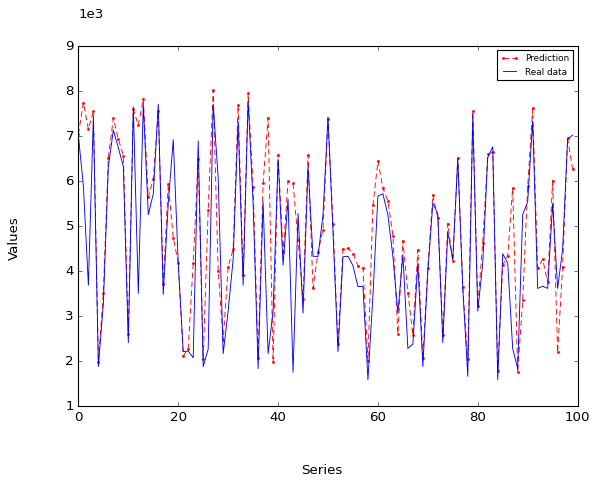

In [77]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


# K-fold cross over

In [86]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd

def create_model(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(input_shape,)))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

kf = KFold(n_splits=5, shuffle=True, random_state=0)  # 5-fold

scores = []

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    
    model = create_model(X_train.shape[1])
    
    model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)
    
  #  scores.append(model.evaluate(X_test, y_test, verbose=0))

#print("平均分数：", np.mean(scores))


10/10 [==============================] - 0s 2ms/step
[0.0, 59.183673469387756, 76.19047619047619, 84.6938775510204, 89.79591836734694, 92.51700680272108, 95.91836734693877, 97.61904761904762, 98.29931972789116, 98.29931972789116, 98.29931972789116]


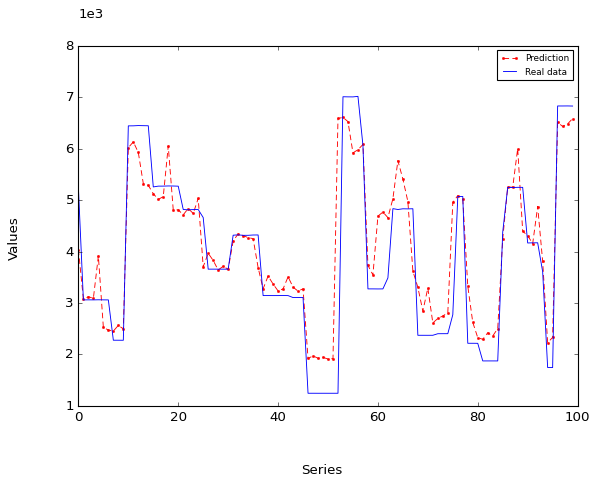

In [87]:
# Make predictions on the test set
import matplotlib.ticker as mticker

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# accuracy
threshold = 0.05  
y_pred=np.array(y_pred)
y_pred = [item for subset in y_pred for item in subset]
y_test=np.array(y_test)
distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
accuracy_cdf=[]
# plot cdf of accurancy
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test, y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

# plot

fig, ax = plt.subplots(facecolor='white', figsize=(8,6))
#ax.set_facecolor('white')
plt.style.use('classic')

plt.plot(y_pred[0:100], marker='o',c='r',markersize = 2, linewidth = 0.8, linestyle='-', markeredgecolor='red', dashes=(5, 3),label='Prediction')
plt.plot(y_test.tolist()[0:100], c='b',linestyle='-',linewidth = 0.8,label='Real data')


plt.legend(loc="upper right", fontsize=8)
fig.text(0.5, 0.01, 'Series', size='12', ha='center')
fig.text(0.01, 0.5, 'Values', size='12', va='center', rotation='vertical')
plt.subplots_adjust(left=0.12, right=0.9, bottom=0.15, top=0.9, wspace=0.3, hspace=0.4)
#plt.grid()
ax.set_facecolor('white')

# Set y-axis tick format
formatter = mticker.FuncFormatter(lambda x, pos: f"{int(x/1000)}")
ax.yaxis.set_major_formatter(formatter)
# Set text in the upper left corner of the figure
fig.text(0.12, 0.98, '1e3', size='12', ha='left', va='top')

#save figure
#folder_path = 'figure/rate_prediction'
#if not os.path.exists(folder_path):
#    os.makedirs(folder_path)
#file_path = os.path.join(folder_path, 'accuracy-linear.pdf' )
#plt.savefig(file_path)

plt.show()


# RNN

In [88]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [91]:
# training  

X = data[corr_throughput]
y = data['output_rate']

# Define the split point
split_point = int(len(X) * 0.7)  # For a 70-30 split

# Split the data sequentially
X_train_seq = X.iloc[:split_point]
X_test_seq = X.iloc[split_point:]
y_train_seq = y.iloc[:split_point]
y_test_seq = y.iloc[split_point:]
X_train_np = X_train_seq.to_numpy().reshape((X_train_seq.shape[0], 1, X_train_seq.shape[1]))
X_test_np = X_test_seq.to_numpy().reshape((X_test_seq.shape[0], 1, X_test_seq.shape[1]))
y_train_np = y_train_seq.to_numpy()
y_test_np = y_test_seq.to_numpy()

# Assuming the scaling and splitting have been done as previously described
X_train = X_train_np.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test = X_test_np.reshape((X_test.shape[0], 1, X_test.shape[1]))


# train the regressor
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(1, X_train.shape[2])))  # 1 time step
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=2)

y_pred_scaled = model.predict(X_test)

# Evaluate
# Assuming y_pred_scaled and y_test are scaled predictions and targets
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y_test_np.values.reshape(-1, 1))
y_pred = scaler_y.inverse_transform(y_pred_scaled)  # Inverse transform predictions
y_test_original = scaler_y.inverse_transform(y_test_np.reshape(-1, 1))  # Inverse transform true targets if scaled

mse = mean_squared_error(y_test_original, y_pred)
r2 = r2_score(y_test_original, y_pred)

#accuracy
threshold = 0.05 
distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
print("Accuracy within 5% threshold:", accuracy_within_threshold)


accuracy_cdf=[]
for threshold in range(11):
    threshold = threshold/10
    distances = [abs(real - pred) / real for real, pred in zip(y_test.values.tolist(), y_pred)]
    accuracy_within_threshold = sum(dist <= threshold for dist in distances) / len(distances) * 100
    accuracy_cdf.append(accuracy_within_threshold)
print(accuracy_cdf)

ValueError: cannot reshape array of size 30900 into shape (1030,1,1)